In [1]:
import sys

In [2]:
# !pip install torch

In [3]:
import sklearn.datasets
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [4]:
import matplotlib.pyplot as plt

In [5]:
print(f"Python: {sys.version}")
print(f"pytorch: {torch.__version__}")

Python: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
pytorch: 2.0.1+cpu


In [6]:
mnist = sklearn.datasets.fetch_openml('mnist_784', data_home ='mnist_784')

In [7]:
mnist.data[:60000]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
type(mnist.data[:60000])

pandas.core.frame.DataFrame

In [9]:
mnist.target[:60000]

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [10]:
x_train = torch.tensor(mnist.data[:60000].to_numpy(), dtype=torch.float) / 255
y_train = torch.tensor([int(x) for x in mnist.target[:60000]])
x_test = torch.tensor(mnist.data[60000:].to_numpy(), dtype=torch.float) / 255
y_test = torch.tensor([int(x) for x in mnist.target[60000:]])

In [11]:
x_train[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

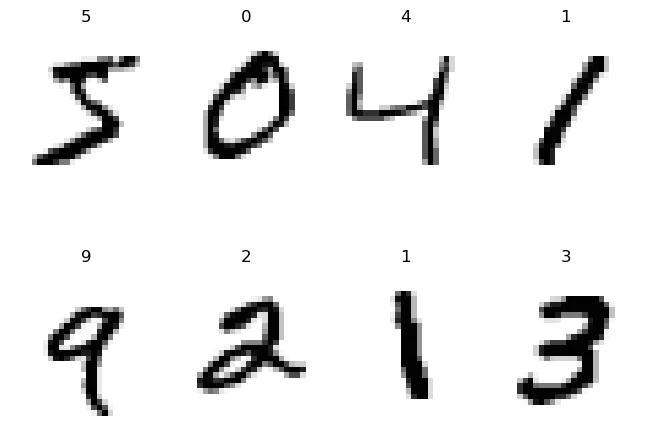

In [12]:
fig, axes = plt.subplots(2, 4, constrained_layout = True)

for i, ax in enumerate(axes.flat):
    ax.imshow(1 - x_train[i].reshape((28, 28)), cmap="gray", vmin=0, vmax=1)
    ax.set(title=f"{y_train[i]}")
    ax.set_axis_off()

log softmax 이해

In [13]:
t = torch.rand(2,2)
t

tensor([[0.1341, 0.8728],
        [0.3279, 0.8258]])

In [14]:
t.squeeze()

tensor([[0.1341, 0.8728],
        [0.3279, 0.8258]])

In [15]:
t.exp()

tensor([[1.1435, 2.3936],
        [1.3881, 2.2836]])

In [16]:
t.exp().sum()

tensor(7.2088)

In [17]:
t2 = t.exp().sum(dim = -1)
t2

tensor([3.5371, 3.6717])

In [18]:
t3 = t2.unsqueeze(-1)
t3

tensor([[3.5371],
        [3.6717]])

In [19]:
t - t3

tensor([[-3.4030, -2.6643],
        [-3.3438, -2.8459]])

In [20]:
def log_softmax (x):
    return x - x.exp().sum(dim=1).log().unsqueeze(-1)

In [21]:
def model(x, weights, bias):
    return log_softmax(x @ weights + bias)

In [22]:
t

tensor([[0.1341, 0.8728],
        [0.3279, 0.8258]])

In [23]:
torch.arange(9)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [24]:
def neg_likelihood(log_pred, y_true):
    return -log_pred[torch.arange(y_true.size()[0]), y_true].mean()
# log_pred 내 에서 i 번째 열 중 y_true에 해당하는 것의 확률들을 전부 평균취한 것
# y_true 는 전부 정수 -> 저기에 들어가는 tensor 값은 전부 정수여야 성립
# indexing 돌아가면서 하는 방법

In [25]:
y_test.size()[0]

10000

In [26]:
y_test[:100]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9])

In [28]:
def accuracy(log_pred, y_true):
    y_pred = torch.argmax(log_pred, dim=1)
    return (y_pred == y_true).to(torch.float).mean()

In [29]:
def print_loss_accuracy(log_pred, y_true, loss_function):
    with torch.no_grad():
        print(f"Loss: {neg_likelihood(log_pred, y_true):.6f}")
        print(f"Accuracy: {100 * accuracy(log_pred, y_true).item():.2f} %")

In [30]:
loss_function = neg_likelihood

In [31]:
batch_size = 100
learning_rate = 0.5
n_epochs = 5

In [32]:
weights = torch.randn(784, 10, requires_grad=True)
bias = torch.randn(10, requires_grad=True)

for epoch in range(n_epochs):
    # Batch 반복
    for i in range(x_train.size()[0] // batch_size):
        start_index = i * batch_size
        end_index = start_index + batch_size
        x_batch = x_train[start_index:end_index]
        y_batch_true = y_train[start_index:end_index]

        # Forward
        y_batch_log_pred = model(x_batch, weights, bias)
        
        loss = loss_function(y_batch_log_pred, y_batch_true)

        # Backward
        loss.backward()

        # Update
        with torch.no_grad():
            weights.sub_(learning_rate * weights.grad)
            bias.sub_(learning_rate * bias.grad)

        # Zero the parameter gradients
        weights.grad.zero_()
        bias.grad.zero_()

    with torch.no_grad():
        y_test_log_pred = model(x_test, weights, bias)
    print(f"End of epoch {epoch + 1}")
    print_loss_accuracy(y_test_log_pred, y_test, loss_function)
    print("---")

End of epoch 1
Loss: 0.637186
Accuracy: 86.00 %
---
End of epoch 2
Loss: 0.523410
Accuracy: 87.72 %
---
End of epoch 3
Loss: 0.476186
Accuracy: 88.49 %
---
End of epoch 4
Loss: 0.448459
Accuracy: 89.13 %
---
End of epoch 5
Loss: 0.429000
Accuracy: 89.21 %
---
